In [1]:
%matplotlib inline

from netCDF4 import Dataset as ncread
import numpy as np
from datetime import datetime, date



In [2]:
pwd

'/home/hillag/python_test/s2s'

In [3]:
# load latitude, longitude
filedir = '/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/'
filename = 'MSL_2000-2019-04-27_2020-04-27_cf.nc'
filepath = filedir+filename

print(filepath)
NC = ncread(filepath)  

# get the grid:
latitude = NC.variables['latitude'][:]
longitude = NC.variables['longitude'][:]

NC.close()

/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/MSL_2000-2019-04-27_2020-04-27_cf.nc


In [4]:
# compute climatolgy for s2s
# 

def compute_clim_and_anom_for_each_lead_time(selday,selmon,veryear,starting_date,period_len):
    mm = selmon;
    dd = selday;
    filedir = '/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/'
    filename = 'MSL_%s-%s-%s-%s_%s-%s-%s_pf.nc.mincl.nc' % (veryear-20,veryear-1,mm,dd,veryear,mm,dd)
    filepath = filedir+filename
    print(filepath)
    NC = ncread(filepath)    
    # get the field of the variable we're interested in:
    FLAG = NC.variables['FLAG'][:]
    print(FLAG.shape)
    NC.close()
    flag_ensm = FLAG
    # compute climatology for 30 days only
    flag_ensm_re = np.reshape(flag_ensm,(10,20,47,181,360));
    flag_ensm_clim = np.mean(flag_ensm_re,axis=1) # average over 20 years
    flag_ensm_clim_30d = flag_ensm_clim[:,starting_date:period_len+starting_date,:,:];
    return flag_ensm_clim_30d


# % dates in January ---------------------------
lead_days = ["02","05","09","12","16","19","23","26","30",\
            "02","06","13","16","20","23","27","30",\
            "03","06","13","17","20","24","27",\
            "02","05","09","12","16","19","23","26","30"]
lead_mons = ["12","12","12","12","12","12","12","12","12",\
             "01","01","01","01","01","01","01","01",\
            "02","02","02","02","02","02","02",\
            "03","03","03","03","03","03","03","03","03"]
ver_years = [2019,2019,2019,2019,2019,2019,2019,2019,2019,\
             2020,2020,2020,2020,2020,2020,2020,2020,\
            2020,2020,2020,2020,2020,2020,2020,\
            2020,2020,2020,2020,2020,2020,2020,2020,2020]

arr_len = len(lead_days)
starting_dates =  0*np.ones(arr_len,dtype=int) #lead0
# starting_dates = 7*np.ones(arr_len,dtype=int) #lead10
period_len =  28 
ens_num =10

tseries_clim_es_all_year = np.zeros((ens_num,period_len,len(latitude),len(longitude),len(lead_days)))

day_ind=0
for i in range(len(lead_days)):
    selday = lead_days[i]
    selmon = lead_mons[i]
    veryear = ver_years[i]
    starting_date = starting_dates[i]
    ind_returned_clim = compute_clim_and_anom_for_each_lead_time(selday,selmon,veryear,starting_date,period_len)
    tseries_clim_es_all_year[:,:,:,:,day_ind]= ind_returned_clim
    day_ind = day_ind +1


/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-02_2019-12-02_pf.nc.mincl.nc
(10, 940, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-05_2019-12-05_pf.nc.mincl.nc
(10, 940, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-09_2019-12-09_pf.nc.mincl.nc
(10, 940, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-12_2019-12-12_pf.nc.mincl.nc
(10, 940, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-16_2019-12-16_pf.nc.mincl.nc
(10, 940, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-19_2019-12-19_pf.nc.mincl.nc
(10, 940, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-23_2019-12-23_pf.nc.mincl.nc
(10, 940, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_1999-2018-12-26_2019-12-26_pf.nc.mincl.nc
(10, 940, 181, 360)


In [5]:
tseries_clim_es_all_year_em=np.mean(tseries_clim_es_all_year,axis=0)


In [6]:
# starting_dates =  0*np.ones(arr_len,dtype=int)
# starting_dates

In [7]:
# compute climatolgy based on these days
avg_clim_djfm_model = np.mean(np.mean(tseries_clim_es_all_year_em,axis=0),axis=2)
print(avg_clim_djfm_model.shape)

print(np.max(avg_clim_djfm_model))

import xarray as xr
ds = xr.DataArray(data=avg_clim_djfm_model,dims=["longitude", "latitude"])
# ,coords=dict(longitude=(longitude),latitude=(latitude)))

# ds = xr.DataArray(data=avg_clim_djfm_model,dims=["x", "y"],coords=dict(lon=(longitude),lat=(latitude)))
# ...     attrs=dict(
# ...         description="Ambient temperature.",
# ...         units="degC",
# ...     ),

# ds.shape
# new_filename = './cyc_djfm_clim_4weeks_lead0.nc'
# print ('saving to ', new_filename)
# ds.to_netcdf(path=new_filename)
# ds.close()

(181, 360)
0.774534632034632


In [8]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.path as mpath
from matplotlib.patches import Rectangle


# import matplotlib
import matplotlib.ticker
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# matplotlib.rc('xtick', labelsize=15); matplotlib.rc('ytick', labelsize=15)

# from mpl_toolkits.basemap import Basemap

/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

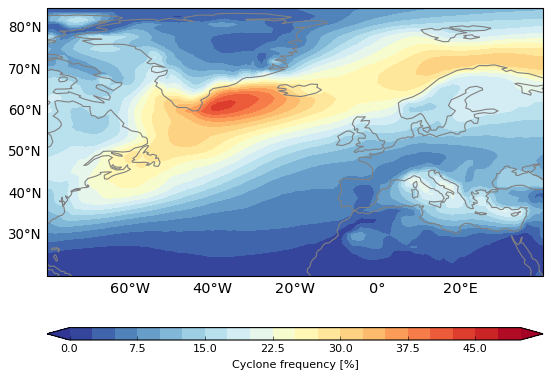

In [9]:
# Plot cyclone for specific year:

#-----------------------------
import matplotlib.colors as mcolors
import matplotlib        as mpl

plt.style.use('classic')
# plt.style.use('seaborn-ticks')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

#You will need to define a few different things:
color='RdYlBu_r'
#colorbar options:
colorbarMin=0
colorbarMax=50
colorspace=2.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=15
colorspace=1
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)


#plot your field:
flag_clim_sel, cyclic_lons = add_cyclic_point(avg_clim_djfm_model, coord=longitude)
h1 = ax.contourf(cyclic_lons,latitude, 100*flag_clim_sel, clevel, cmap=color,extend='both')
# 

#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)
ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}


savelocation="Figures/"
savefileName='climatology_cyclone_model_djfm_28days_lead0.pdf'
# fig.savefig(savelocation+savefileName)





In [10]:
# # climatolgy obs: ERA5

filedir = '/s2s/hillag/cyclone/'
filename = 'cyclone_1979_2019_daily.nc';
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)    
# get the field of the variable we're interested in:
cyc = NC.variables['c'][:]
NC.close()

#-------
# load latitude, longitude
selyear = 1979
filedir = '/s2s/hillag/cyclone/'
filename = 'cyc_era_clim_split.nc%s.nc' %(selyear) 
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the grid:
latitude_c = NC.variables['lat'][:]
longitude_c = NC.variables['lon'][:]
NC.close()
#-------



/s2s/hillag/cyclone/cyclone_1979_2019_daily.nc
/s2s/hillag/cyclone/cyc_era_clim_split.nc1979.nc


In [11]:
# compute climatology 
cyc_clim = np.mean(cyc[0:39,:,:,:],axis=0); # an average over 39 years
print(cyc_clim.shape)
# compute anomalies
cyc_anom = cyc - cyc_clim;
# sum daily field for the selected days
# period_len=7

tseries_clim_obs = np.zeros((period_len,len(latitude_c),len(longitude_c),len(lead_days)))
tseries_anom_obs= np.zeros((41,period_len,len(latitude_c),len(longitude_c),len(lead_days)))

day_ind=0;

for i in range(len(lead_days)):
    selday = np.array(lead_days)[i].astype(int)
    selmon= np.array(lead_mons)[i].astype(int)
#     selyear = np.array(lead_years)[i].astype(int)
    day_of_year = date(selyear, selmon, selday).timetuple().tm_yday;
    print("Day of year: ", day_of_year, "\n");
     
    cyc_clim_30d = cyc_clim[day_of_year:day_of_year+period_len,:,:]
    cyc_anom_30d = cyc_anom[:,day_of_year:day_of_year+period_len,:,:]
    if (len(cyc_clim_30d)<period_len):
        print(len(cyc_clim_30d))
        day_of_year_jan=1
        period_len_jan=period_len-len(cyc_clim_30d)
        cyc_clim_30d= np.append(cyc_clim_30d,cyc_clim[day_of_year_jan:day_of_year_jan+period_len_jan,:,:],axis=0)
        cyc_anom_30d= np.append(cyc_anom_30d,cyc_anom[:,day_of_year_jan:day_of_year_jan+period_len_jan,:,:],axis=1)
    tseries_clim_obs[:,:,:,day_ind] = cyc_clim_30d
    tseries_anom_obs[:,:,:,:,day_ind] = cyc_anom_30d
    day_ind = day_ind+1
    



(365, 181, 361)
Day of year:  336 

Day of year:  339 

26
Day of year:  343 

22
Day of year:  346 

19
Day of year:  350 

15
Day of year:  353 

12
Day of year:  357 

8
Day of year:  360 

5
Day of year:  364 

1
Day of year:  2 

Day of year:  6 

Day of year:  13 

Day of year:  16 

Day of year:  20 

Day of year:  23 

Day of year:  27 

Day of year:  30 

Day of year:  34 

Day of year:  37 

Day of year:  44 

Day of year:  48 

Day of year:  51 

Day of year:  55 

Day of year:  58 

Day of year:  61 

Day of year:  64 

Day of year:  68 

Day of year:  71 

Day of year:  75 

Day of year:  78 

Day of year:  82 

Day of year:  85 

Day of year:  89 



In [12]:
cyc_clim.shape

(365, 181, 361)

In [13]:
print(tseries_clim_obs.shape)

# compute climatolgy based on these days
avg_clim_djfm_obs = np.mean(np.mean(tseries_clim_obs,axis=0),axis=2)
print(avg_clim_djfm_obs.shape)

print(avg_clim_djfm_obs.shape)

ds = xr.DataArray(data=avg_clim_djfm_obs,dims=["longitude", "latitude"])
# ,coords=dict(longitude=(longitude),latitude=(latitude)))

# ds = xr.DataArray(data=avg_clim_djfm_model,dims=["x", "y"],coords=dict(lon=(longitude),lat=(latitude)))
# ...     attrs=dict(
# ...         description="Ambient temperature.",
# ...         units="degC",
# ...     ),

# new_filename = './cyc_djfm_clim_obs_28days_lead0.nc'
# print ('saving to ', new_filename)
# ds.to_netcdf(path=new_filename)
# ds.close()

(28, 181, 361, 33)
(181, 361)
(181, 361)


/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

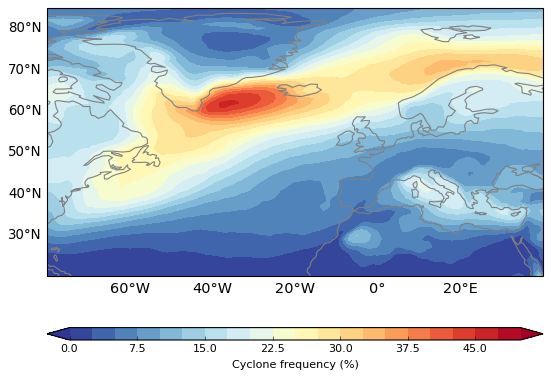

In [14]:
# Plot cyclone for specific year:
#-----------------------------
import matplotlib.colors as mcolors
import matplotlib        as mpl

plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

#You will need to define a few different things:
color='RdYlBu_r'

#colorbar options:
colorbarMin=0
colorbarMax=50
colorspace=2.5
cclevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=15
colorspace=1
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)


#plot your field:
flag_clim_sel, cyclic_lons = add_cyclic_point(avg_clim_djfm_obs, coord=longitude_c)
h1 = ax.contourf(cyclic_lons,latitude_c, 100*flag_clim_sel, clevel, cmap=color,extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency (%)' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)
ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}


savelocation="Figures/"
savefileName='climatology_cyclone_obs_djfm_28days_lead0_djfm.pdf'
# fig.savefig(savelocation+savefileName)



In [46]:
# compute model bias, spread, and significance

print(avg_clim_djfm_model.shape)
print(avg_clim_djfm_obs.shape)

latitude_r = latitude_c[::-1]
longitude_r = longitude_c[0:360]+180
# longitude_r = longitude_c[0:360]

# --- bias between model and obs----
# avg_clim_djfm_obs_r = avg_clim_djfm_obs[::-1,0:360]
avg_clim_djfm_obs_r = np.roll(avg_clim_djfm_obs[::-1,0:360],180, axis=1)

avg_bias = avg_clim_djfm_model - avg_clim_djfm_obs_r


#------- model spread ------ 
tseries_clim_es_all_year_timemean=np.mean(tseries_clim_es_all_year,axis=1)
avg_clim_es_all_year_timemean=np.mean(tseries_clim_es_all_year_timemean,axis=3)
avg_clim_djfm_model_spread=np.std(avg_clim_es_all_year_timemean,axis=0)



(181, 360)
(181, 361)


In [16]:
# open model climatology (created & saved earlier in this file)
fn = './cyc_djfm_clim_4weeks_lead0.nc'
NC = ncread(fn)
cyc_clim_model = NC.variables['__xarray_dataarray_variable__'][:]

print(cyc_clim_model.shape)
# cyc_anom_avg=np.mean(tseries_model_time_avg_em,axis=2)


(181, 360)


In [17]:
from scipy import stats

# % significance for cyc freq anomalies
# ---------------------------------
# cyc_anom_avg-cyc_anom_avg_obs[::-1,:]
# ---------------------------------

# ------ for the siginificance -----
tseries_clim_obs.shape
tseries_clim_obs_timemean = np.mean(tseries_clim_obs,axis=0)
tseries_clim_obs_timemean_r = tseries_clim_obs_timemean[::-1,0:360]

# tseries_clim_obs_timemean_r.shape

# p values
X=np.mean(tseries_clim_es_all_year_em,axis=0)
Y=tseries_clim_obs_timemean_r
yy,tt,ll = X.shape
p_array_cyc_diff = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:]-Y[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_diff[ii,jj]=p
        
p_array_cyc_diff.shape
# ---------------------------------

(181, 360)

/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

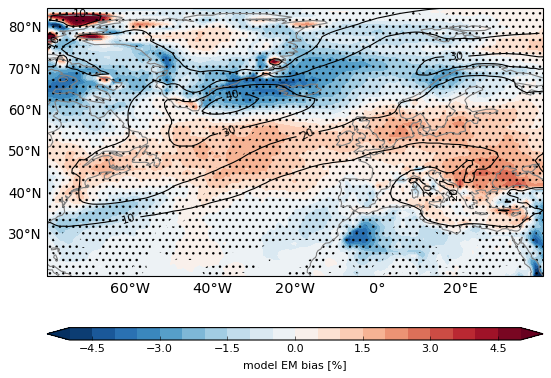

In [53]:

# Plot cyclone for all events:
#-----------------------------

plt.style.use('classic')
# plt.style.use('seaborn-ticks')

fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())

    
color = 'RdBu_r' # The color of the filled contours, there are many options, so get creative!
#colorbar options:
colorbarMin=-5
colorbarMax=5
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=1*100
colorspace=0.1*100
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

# flag_anom_sel, cyclic_lons_r = add_cyclic_point(avg_bias, coord=longitude_r)
flag_anom_sel, cyclic_lons_r = add_cyclic_point(avg_clim_djfm_model-avg_clim_djfm_obs_r, coord=longitude_r)
flag_ensm_clim, cyclic_lons = add_cyclic_point(cyc_clim_model, coord=longitude_r)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_diff, coord=longitude_r)

h1 = ax.contourf(cyclic_lons_r,latitude_r, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons,latitude_r, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons_r, latitude_r, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')

#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='model EM bias [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}


savelocation="Figures/"
savefileName='bias_clim_djfm_28days_lead0_djfm.pdf'
# fig.savefig(savelocation+savefileName)




/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/Miniconda3-envs/envs/2022/envs/iacpy3_2022/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

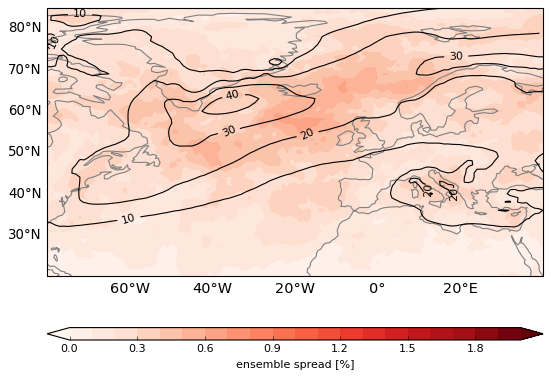

In [19]:
# Plot spread averaged for all events:
#-----------------------------

plt.style.use('classic')
# plt.style.use('seaborn-ticks')

fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())

    
color = 'Reds' # The color of the filled contours, there are many options, so get creative!
#colorbar options:
colorbarMin=0
colorbarMax=2
colorspace=0.1
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=1*100
colorspace=0.1*100
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

flag_anom_sel, cyclic_lons_r = add_cyclic_point(avg_clim_djfm_model_spread, coord=longitude_r)
flag_ensm_clim, cyclic_lons = add_cyclic_point(cyc_clim_model, coord=longitude)
# flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_diff, coord=longitude_r)

h1 = ax.contourf(cyclic_lons_r,latitude_r, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons,latitude, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
# hs = ax.contourf(cyclic_lons_r, latitude_r, flag_ensm_stat, levels=p_levels, hatches=hatches,
#                   colors='none',extend='both')

#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='ensemble spread [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}


savelocation="Figures/"
savefileName='spread_clim_djfm_28days_lead0_djfm.pdf'
# fig.savefig(savelocation+savefileName)


